In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Loading California Dataset

In [2]:
from sklearn.datasets import fetch_california_housing

california= fetch_california_housing()

In [3]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
# Checking the description intially
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [5]:
print(california.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [6]:
print(california.target)
print(california.target_names)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]
['MedHouseVal']


In [7]:
print(california.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## Preparing the Dataset

In [8]:
dataset=pd.DataFrame(california.data, columns=california.feature_names)  # help us to create entire independent features 

In [9]:
dataset.head() # All independent feature

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
dataset['Price']= california.target

In [11]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [13]:
# Summarizing the Stats of the data
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [14]:
# Check the Missing values (Very Important)
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

# Exploratary Data Analysis

<Axes: >

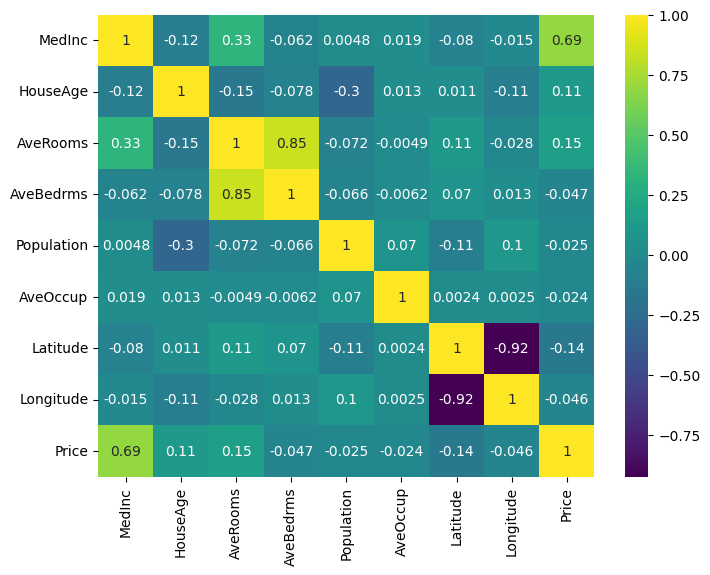

In [15]:
# Coorelation (Very important in any Regression problrm)
dataset.corr()
# Try to check always the correlation between two independent feature
# and the correlation between independent and dependent features '''
 
 ## If there is high cooleniearity between independent and dependent features remove one independent feature because...that is called 
 # multi-Coolinearity which can affect the model.
import seaborn as sns
plt.figure(figsize=(8, 6)) # Adjust figure size for better visualization
sns.heatmap(dataset.corr(), annot=True, cmap='viridis')

## Analyze the coorelated Features

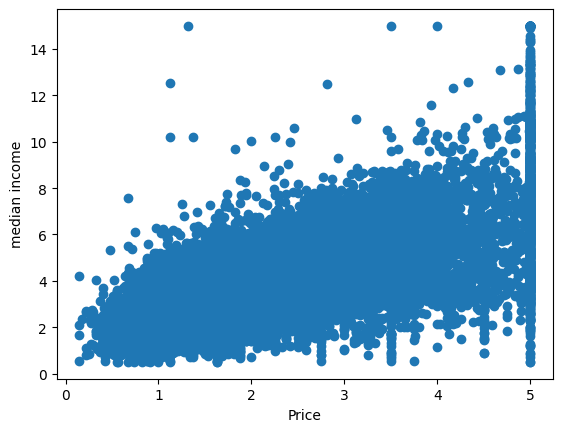

In [16]:
# Plotting scatter plots individually for better visuals
plt.scatter(dataset['Price'],dataset['MedInc'])
plt.xlabel("Price")
plt.ylabel("median income")
plt.show()

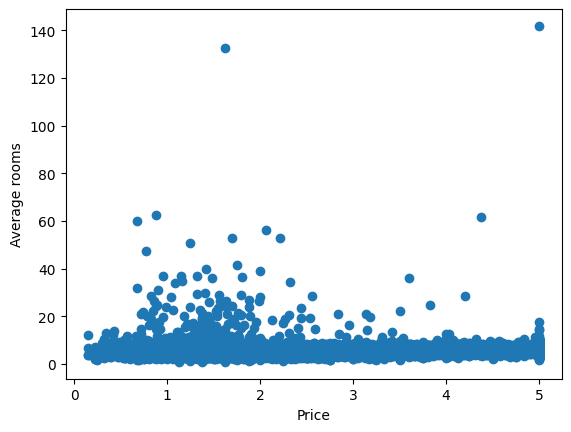

In [17]:
# Plotting scatter plots individually for better visuals
plt.scatter(dataset['Price'],dataset['AveRooms'])
plt.xlabel("Price")
plt.ylabel("Average rooms")
plt.show()

<Axes: xlabel='MedInc', ylabel='Price'>

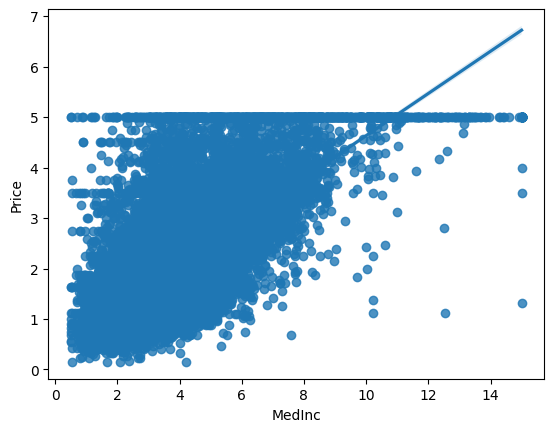

In [19]:
import seaborn as sns
sns.regplot(x='MedInc',y='Price',data=dataset)

<Axes: xlabel='AveRooms', ylabel='Price'>

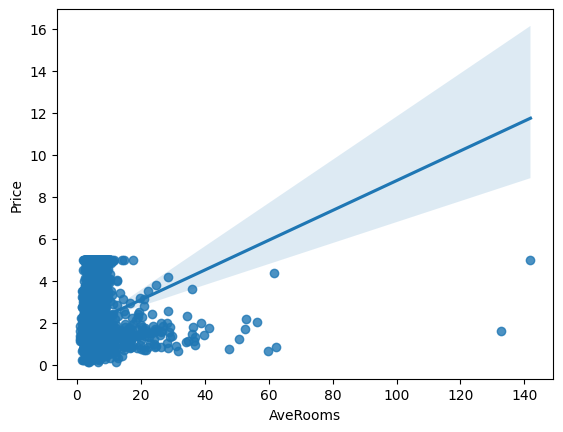

In [20]:
import seaborn as sns
sns.regplot(x='AveRooms',y='Price',data=dataset)

So Always choose linearity. either positive or negative.

In [ ]:
# Dividing the data set with dependent and independent features

X= dataset.iloc[:,:-1] # Independent Features

y= dataset.iloc[:,-1]  # Dependent feature

In [22]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [23]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64

In [24]:
## Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [26]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [27]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93
...,...,...,...,...,...,...,...,...
17505,2.9545,47.0,4.195833,1.020833,581.0,2.420833,37.36,-121.90
13512,1.4891,41.0,4.551852,1.118519,994.0,3.681481,34.11,-117.32
10842,3.5120,16.0,3.762287,1.075614,5014.0,2.369565,33.67,-117.91
16559,3.6500,10.0,5.502092,1.060371,5935.0,3.547519,37.82,-121.28


 We do the gradient descent in linear regression for that to reach global minima, for that our independent variables should be at same scale
 and convergence can happen quickly by standardscaling the independent data

In [ ]:
## Standarazing the data set
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler() 

 

In [29]:
X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # we Dont write fit transform to prevent the leakeage of data(test data set alreading peeking in train data set to make it bias)

In [30]:
X_test

array([[-1.1526893 , -0.28346293, -0.50781822, ...,  0.06127763,
         0.19166399,  0.28664112],
       [-0.70640568,  0.11294728, -0.16252032, ..., -0.03551561,
        -0.23911452,  0.06196251],
       [-0.20830675,  1.85715216, -0.59546738, ..., -0.14215427,
         1.00639726, -1.42590916],
       ...,
       [-0.19155996, -0.99700129, -0.6830438 , ..., -0.06058827,
        -0.92742367,  0.8358555 ],
       [-0.11911302, -1.47269353,  0.02607207, ...,  0.03461374,
         1.01576201, -0.84673764],
       [-0.43304974, -0.91771925, -0.84872893, ..., -0.0407528 ,
        -0.70266966,  0.67109119]], shape=(6192, 8))

In [31]:
X_train

array([[ 0.13350629,  0.50935748,  0.18106017, ..., -0.01082519,
        -0.80568191,  0.78093406],
       [-0.53221805, -0.67987313, -0.42262953, ..., -0.08931585,
        -1.33947268,  1.24526986],
       [ 0.1709897 , -0.36274497,  0.07312833, ..., -0.04480037,
        -0.49664515, -0.27755183],
       ...,
       [-0.49478713,  0.58863952, -0.59156984, ...,  0.01720102,
        -0.75885816,  0.60119118],
       [ 0.96717102, -1.07628333,  0.39014889, ...,  0.00482125,
         0.90338501, -1.18625198],
       [-0.68320166,  1.85715216, -0.82965604, ..., -0.0816717 ,
         0.99235014, -1.41592345]], shape=(14448, 8))

## Model Training

In [32]:
from sklearn.linear_model import LinearRegression
Regression= LinearRegression()

In [33]:
Regression.fit(X_train,y_train)

LinearRegression()

In [34]:
## Print Coeeficients
print(Regression.coef_)

[ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]


So it says with increase of the column names value in each the price will increase or decrease.

In [36]:
#Intercept
print(Regression.intercept_) # Model predciting values of house price when all input features are 0.

2.0692396089424165


#### If all your feature values were 0, the model would predict the target (e.g., house price) to be approximately 2.07.

In [37]:
## on which parameters the model has been trained
Regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [40]:
## Prediction with Test data

reg_pred= Regression.predict(X_test)

reg_pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133], shape=(6192,))

## Imp things to note
For X test ---> y test is the true value. so how do we check wether the model has performed good or bad/\.


### Assumptions

Text(0, 0.5, 'reg_pred')

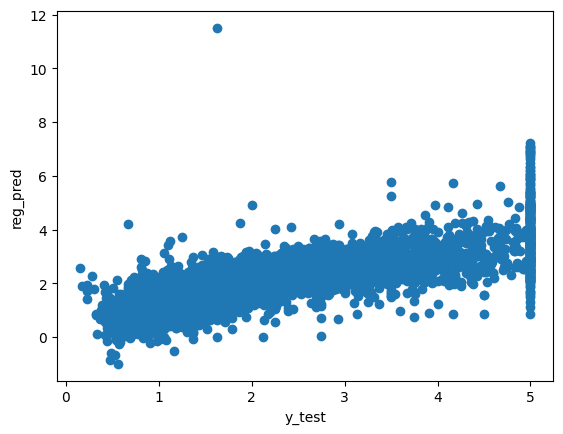

In [43]:
## Plot a scatter plot for the prediction
plt.scatter(y_test, reg_pred)
plt.xlabel('y_test')
plt.ylabel('reg_pred')

Here We can intepret that our model prediction and y_test both are similar so we can say our model is working fine


In [45]:
# Finding the error

Residual= y_test-reg_pred  ## 

Residual

20046   -0.249049
3024    -1.309434
15663    2.289088
20484   -0.649147
9814     0.173042
           ...   
17505    0.155059
13512   -0.237516
10842    0.109345
16559   -0.379714
5786     0.270559
Name: Price, Length: 6192, dtype: float64

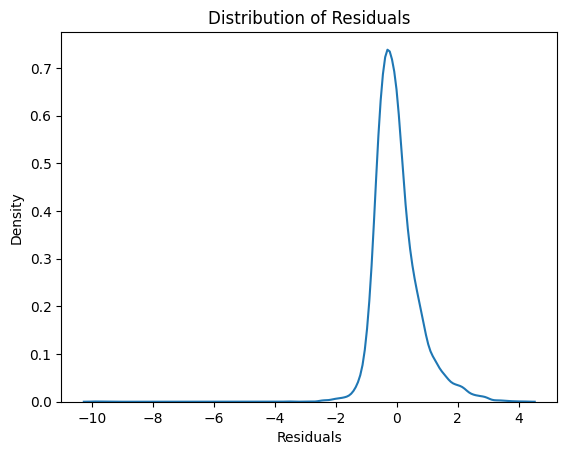

In [49]:
## Plotting the Residuals

sns.kdeplot(Residual)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()

##### The Distribution of Error seems pretty normalized and there are some points which also extend to 4. Still feel that our model is performing good as the distribution is normal. 

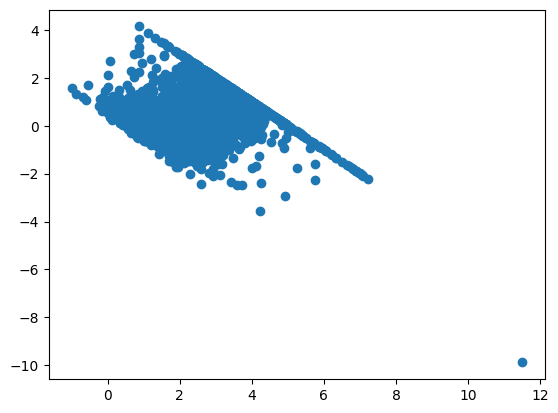

In [ ]:
## Scatter plot with respect to prediction and residuals
# Uniform Distribution.

plt.scatter(reg_pred,Residual)

In [52]:
# Performance Matrixs

from sklearn.metrics import mean_squared_error , mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

0.5272474538305952
0.5305677824766752
0.7284008391515452


## R Square and Adjusted R-Square.


In [53]:
from sklearn.metrics import r2_score
score= r2_score(y_test,reg_pred)
print(score)     # The more close to 1 better the score.

0.5957702326061665


In [54]:
# Adjusted R-square
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5952472117200027

 The Model is moderately performing good. And Adjusted R Square is always less then R Square.
 

## New Data Prediction

In [55]:
california.data[0].reshape(1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

This is used when you want to make a prediction for a single instance (i.e., one house), using a model that expects a 2D array as input.
 a 2D array with 1 row and 8 columns

In [57]:
# Transformation of new data 
scaler.transform(california.data[0].reshape(1,-1))

C:\Users\16822\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.33526315,  0.98504972,  0.63012521, -0.16586931, -0.96995366,
        -0.04555657,  1.04385626, -1.32105914]])

In [59]:
Regression.predict(scaler.transform(california.data[0].reshape(1,-1)))

C:\Users\16822\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.14333441])

### Pickling the Model For Deployment

### Bascially you are saving the model as it is to load it back and use it as it is. so you wont have to retrain your model everytime.

In [60]:
import pickle

In [61]:
pickle.dump(Regression,open('regmodel.pkl','wb'))

In [62]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [ ]:
## Prediction. 
pickled_model.predict(scaler.transform(california.data[0].reshape(1,-1)))

C:\Users\16822\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.14333441])